In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')



from statsmodels.tsa.stattools import adfuller

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
data =  pd.read_csv('TATAMOTORS.NS.csv', parse_dates=['Date'], index_col= 'Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,489.252289,494.149750,487.026154,493.160370,489.917236,944551.0
2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816742,7979598.0
2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0


In [4]:
data.isnull().sum()


Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [5]:
data.dropna(inplace = True , axis = 0)

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2359 entries, 2015-01-01 to 2024-07-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2359 non-null   float64
 1   High       2359 non-null   float64
 2   Low        2359 non-null   float64
 3   Close      2359 non-null   float64
 4   Adj Close  2359 non-null   float64
 5   Volume     2359 non-null   float64
dtypes: float64(6)
memory usage: 129.0 KB


In [8]:
import statsmodels.api as sm

for i in data.columns:
    print('{} durbin watsen test = {}'.format(i ,  sm.stats.durbin_watson(data[i])))

Open durbin watsen test = 0.0004248381601064135
High durbin watsen test = 0.0003633494688975887
Low durbin watsen test = 0.00042839832296449984
Close durbin watsen test = 0.0004477992393896222
Adj Close durbin watsen test = 0.0004475090896583436
Volume durbin watsen test = 0.2703755678323773


<Axes: xlabel='Date'>

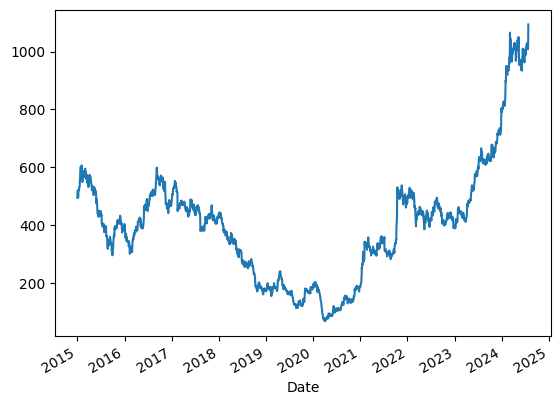

In [9]:
data['High'].plot()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_additive = seasonal_decompose(data['High'] , period = 12 , model = 'additive' )
seasonal_multiplicative = seasonal_decompose(data['High'] , period = 12 , model = 'multiplicative' )


# checking trend, seasonality 

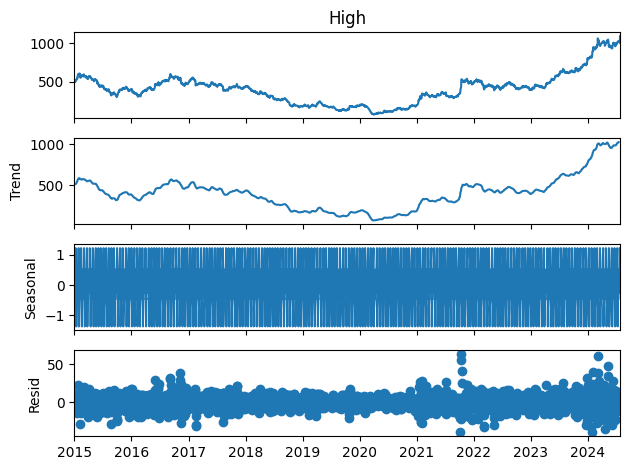

In [11]:
seasonal_additive.plot()
plt.show()

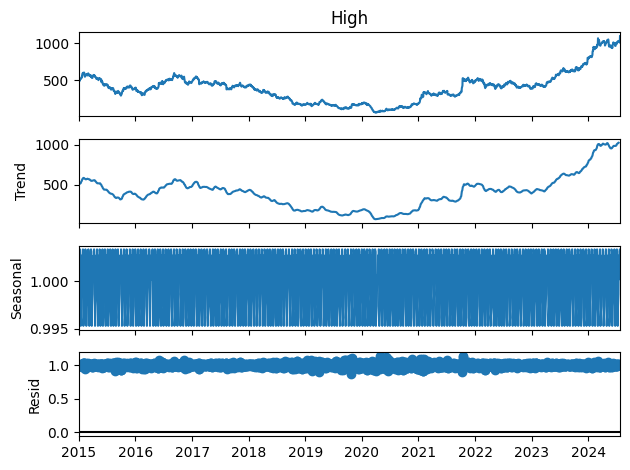

In [12]:
seasonal_multiplicative.plot()
plt.show()

# Train and Test Spliting finding the p,d,q values

In [13]:
train = data[data.index.year <= 2022]
test =  data[data.index.year > 2022]
test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,392.500000,396.000000,391.000000,394.799988,392.362549,10501357.0
2023-01-03,396.000000,398.350006,393.000000,393.899994,391.468079,9431220.0
2023-01-04,394.799988,394.799988,385.000000,385.600006,383.219360,16121049.0
2023-01-05,387.899994,388.750000,382.500000,386.899994,384.511322,10443908.0
2023-01-06,386.100006,388.399994,381.000000,382.000000,379.641571,8715469.0
...,...,...,...,...,...,...
2024-07-19,1024.000000,1024.000000,986.650024,990.000000,990.000000,7400178.0
2024-07-22,990.000000,1008.000000,976.549988,1003.150024,1003.150024,7396198.0
2024-07-23,1007.900024,1008.650024,967.200012,1001.799988,1001.799988,10384177.0


# Checking Train and Test Sationary

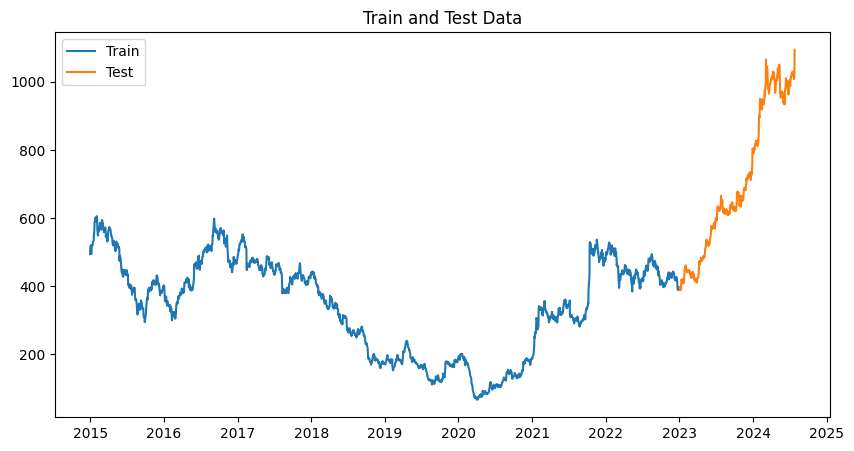

ADF Statistic for training data: -2.13727258476155
p-value for training data: 0.22979353177381395


In [14]:
# ADF Test on training data
train_series = train['High']
result_train = adfuller(train_series)


import matplotlib.pyplot as plt

# Plot training and testing data
plt.figure(figsize=(10,5))
plt.plot(train.index, train['High'], label='Train')
plt.plot(test.index, test['High'], label='Test')
plt.title('Train and Test Data')
plt.legend()
plt.show()


print('ADF Statistic for training data:', result_train[0])
print('p-value for training data:', result_train[1])


In [15]:
# train['1stdiff'] = train.Open- train.Open.shift(1)


In [16]:
# ADF Test on testing data
test_series = test['High']
result_test = adfuller(test_series)

print('ADF Statistic for testing data:', result_test[0])
print('p-value for testing data:', result_test[1])


ADF Statistic for testing data: 0.1825064487093987
p-value for testing data: 0.9712631885766313


In [17]:
# Differencing training data (d=12)
train_diff = (train_series - train_series.shift(12)).dropna()

# Differencing testing data (d=1)
test_diff = (test_series - test_series.shift(12)).dropna()

# Re-run ADF test on differenced data
result_train_diff = adfuller(train_diff)
result_test_diff = adfuller(test_diff)

print('p-value after differencing (train):', result_train_diff[1])
print('p-value after differencing (test):', result_test_diff[1])


p-value after differencing (train): 4.371657239315469e-09
p-value after differencing (test): 0.1526972501096988


In [18]:
test_diff = (test_diff - test_diff.shift(12)).dropna()
result_test_diff = adfuller(test_diff)
print('p-value after differencing (test):', result_test_diff[1])


p-value after differencing (test): 0.00030398762883578637


# Checking P, Q values

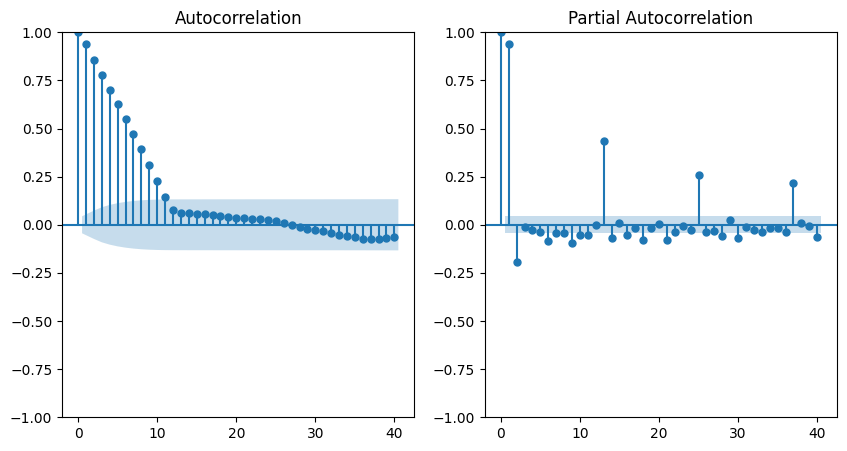

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for the differenced data
plt.figure(figsize=(10,5))

plt.subplot(121)
plot_acf(train_diff, lags=40, ax=plt.gca())  # ACF Plot (to find q)

plt.subplot(122)
plot_pacf(train_diff, lags=40, ax=plt.gca())  # PACF Plot (to find p)

plt.show()


# Checking Seanolity 

# Model Building

# ARIMA 

C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


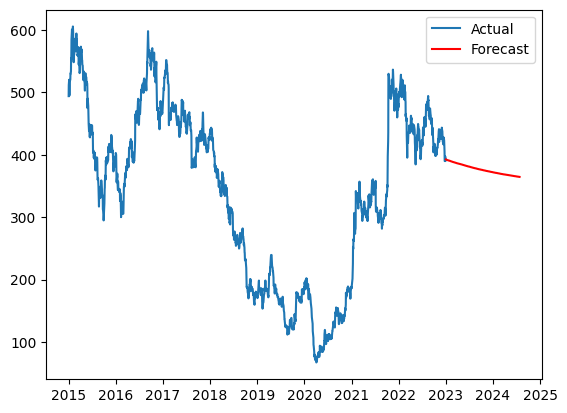

In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model on differenced training data
model = ARIMA(train['High'], order=(2,0,2))  #(p, d, q)
model_fit = model.fit()

# Forecast on the test data
forecast = model_fit.forecast(steps=len(test))


# Evaluate and plot the forecast
# plt.plot(test.High, label='Actual')
# plt.plot(test.index, forecast, label='Forecast' , color = 'red')
plt.plot(train.index, train['High'], label='Actual')
plt.plot(test.index, forecast, label='Forecast' , color = 'red')
plt.legend()
plt.show()


In [24]:
forecast

1976    392.579470
1977    392.421814
1978    392.359217
1979    392.211493
1980    392.140845
           ...    
2354    364.782503
2355    364.735260
2356    364.688119
2357    364.641081
2358    364.594146
Name: predicted_mean, Length: 383, dtype: float64

# SARIMAX

C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


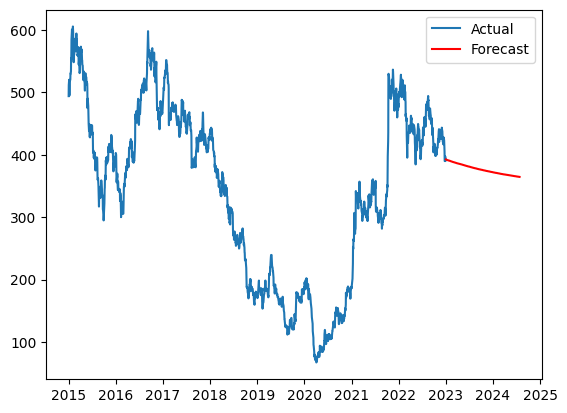

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit ARIMA model on differenced training data
model = SARIMAX(train['High'], order=(1,1,0) , seasonal_order=(1,1,0,12) ) #(p, d, q)
model_fit = model.fit()

# Forecast on the test data
train['forecast'] = model_fit.forecast(steps=len(test))

# Evaluate and plot the forecast
# train[['High' , 'forecast']].plot()
plt.plot(train.index, train['High'], label='Actual')
plt.plot(test.index, forecast, label='Forecast' , color = 'red')
plt.legend()
plt.show()


In [26]:
forecast

1976    392.579470
1977    392.421814
1978    392.359217
1979    392.211493
1980    392.140845
           ...    
2354    364.782503
2355    364.735260
2356    364.688119
2357    364.641081
2358    364.594146
Name: predicted_mean, Length: 383, dtype: float64

# ExponentialSmoothing

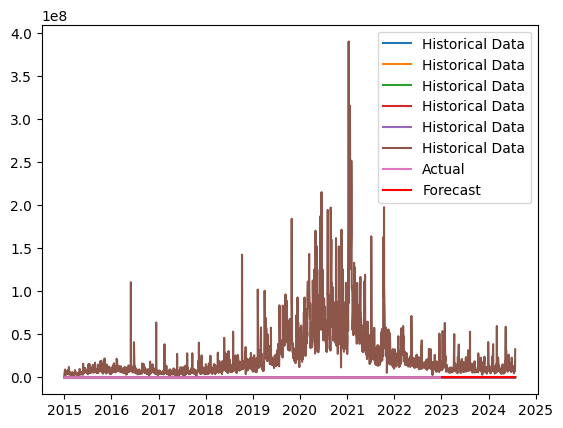

In [93]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters model
model = ExponentialSmoothing(train['High'], seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))
plt.plot(data, label='Historical Data')
plt.plot(train.index, train['High'], label='Actual')
plt.plot(test.index, forecast, label='Forecast' , color = 'red')
plt.legend()
plt.show()


# STL Decomposition

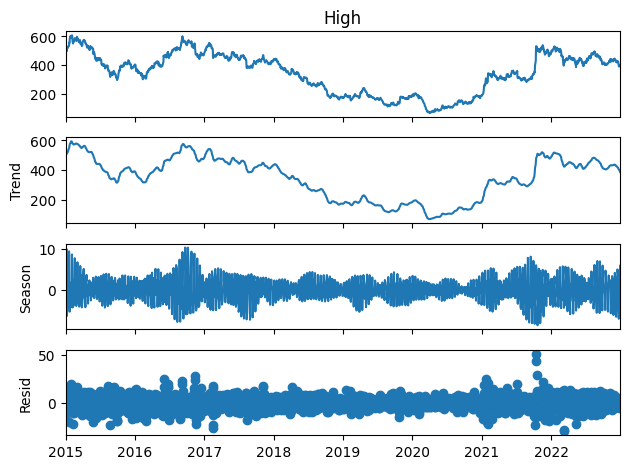

In [100]:
from statsmodels.tsa.seasonal import STL

# Decompose
stl = STL(train['High'], seasonal=13 ,period = 10)
result = stl.fit()

# Plot components
result.plot()
plt.show()


# LSTM

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Example time series data
data = np.random.randn(100)
data = data.reshape((len(data), 1))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit model
model.fit(X, y, epochs=300, verbose=0)

# Forecast
last_sequence = scaled_data[-time_step:].reshape((1, time_step, 1))
forecast = model.predict(last_sequence)
forecast = scaler.inverse_transform(forecast)
print(forecast)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
[[-0.0888708]]


# ETS Model

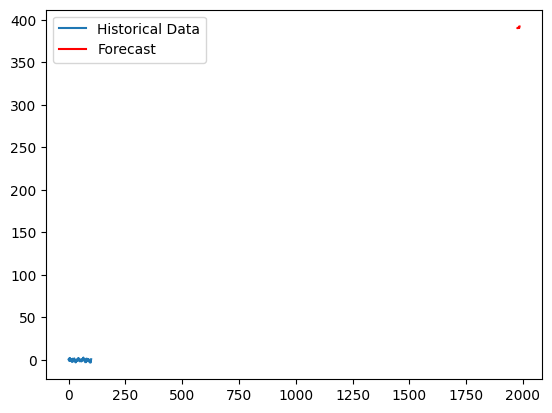

In [108]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

model = ETSModel(train['High'], error='add', trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=10)
plt.plot(data, label='Historical Data')
plt.plot(range(len(train), len(train) + 10), forecast, label='Forecast', color='red')
plt.legend()
plt.show()


# Fourier series

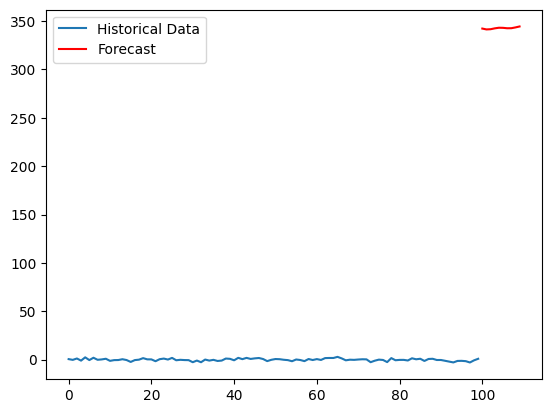

In [107]:
from statsmodels.tsa.deterministic import DeterministicProcess


# Define Fourier terms
dp = DeterministicProcess(index=train.index, constant=True, period=12, fourier=2)
X = dp.in_sample()

# Fit model
model = sm.OLS(train.High, X)
model_fit = model.fit()

# Forecast
future_index = pd.date_range(start=data.index[-1], periods=10, freq='D')
X_future = dp.out_of_sample(steps=10)
forecast = model_fit.predict(X_future)

plt.plot(data, label='Historical Data')
plt.plot(range(len(data), len(data) + 10), forecast, label='Forecast', color='red')
plt.legend()
plt.show()


# Prophet Model

In [29]:
# !pip install prophet


df = pd.DataFrame({'ds' : data.index , 'y' : data.High} )



In [30]:
df.tail()

,ds,y
Date,,
2024-07-19,2024-07-19,1024.000000
2024-07-22,2024-07-22,1008.000000
2024-07-23,2024-07-23,1008.650024
2024-07-24,2024-07-24,1034.250000
2024-07-25,2024-07-25,1094.000000


In [31]:
df.reset_index(drop = True , inplace = True)

In [32]:
from prophet import Prophet
fb = Prophet()
model = fb.fit(df)


17:54:38 - cmdstanpy - INFO - Chain [1] start processing
17:54:40 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
feature = model.make_future_dataframe(periods=383, freq= 'B' )

predict = model.predict(feature)
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,573.517466,514.958712,627.472880,573.517466,573.517466,-3.766772,-3.766772,-3.766772,4.943379,4.943379,4.943379,-8.710151,-8.710151,-8.710151,0.0,0.0,0.0,569.750694
1,2015-01-02,572.743974,510.615500,630.263626,572.743974,572.743974,-3.432493,-3.432493,-3.432493,4.649010,4.649010,4.649010,-8.081503,-8.081503,-8.081503,0.0,0.0,0.0,569.311481
2,2015-01-05,570.423497,512.451436,627.455425,570.423497,570.423497,-1.224078,-1.224078,-1.224078,4.421486,4.421486,4.421486,-5.645564,-5.645564,-5.645564,0.0,0.0,0.0,569.199420
3,2015-01-06,569.650005,511.261694,632.549573,569.650005,569.650005,1.460972,1.460972,1.460972,6.112235,6.112235,6.112235,-4.651263,-4.651263,-4.651263,0.0,0.0,0.0,571.110977
4,2015-01-07,568.876513,505.106901,625.282881,568.876513,568.876513,0.004387,0.004387,0.004387,3.574098,3.574098,3.574098,-3.569711,-3.569711,-3.569711,0.0,0.0,0.0,568.880900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2737,2026-01-07,1478.656339,1207.334488,1734.142781,1214.401559,1740.074262,0.287907,0.287907,0.287907,3.574098,3.574098,3.574098,-3.286191,-3.286191,-3.286191,0.0,0.0,0.0,1478.944246
2738,2026-01-08,1479.582392,1202.642478,1745.335806,1213.881488,1742.017826,2.841214,2.841214,2.841214,4.943379,4.943379,4.943379,-2.102165,-2.102165,-2.102165,0.0,0.0,0.0,1482.423606
2739,2026-01-09,1480.508445,1222.515787,1750.808366,1213.244932,1743.952780,3.805721,3.805721,3.805721,4.649010,4.649010,4.649010,-0.843290,-0.843290,-0.843290,0.0,0.0,0.0,1484.314165
2740,2026-01-12,1483.286602,1209.751180,1765.001589,1214.460480,1747.739840,7.716989,7.716989,7.716989,4.421486,4.421486,4.421486,3.295502,3.295502,3.295502,0.0,0.0,0.0,1491.003591


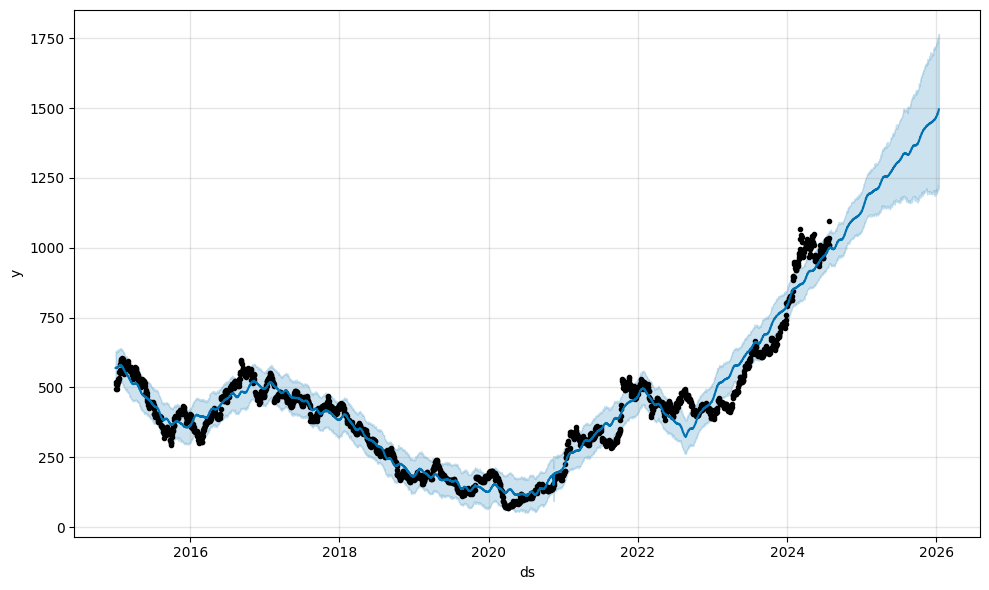

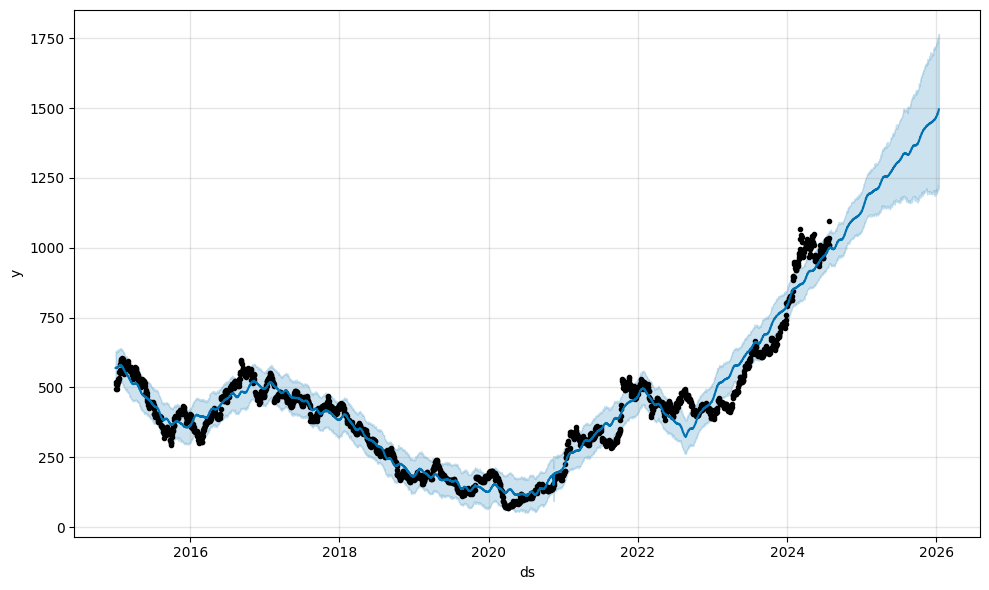

In [34]:
model.plot(predict)

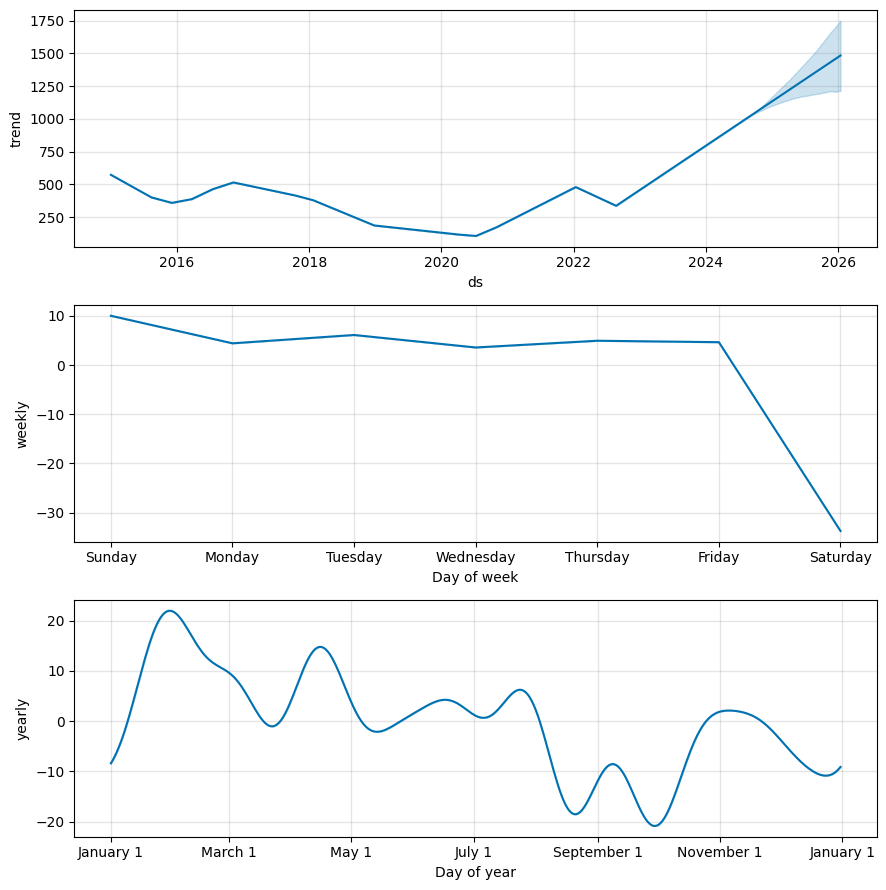

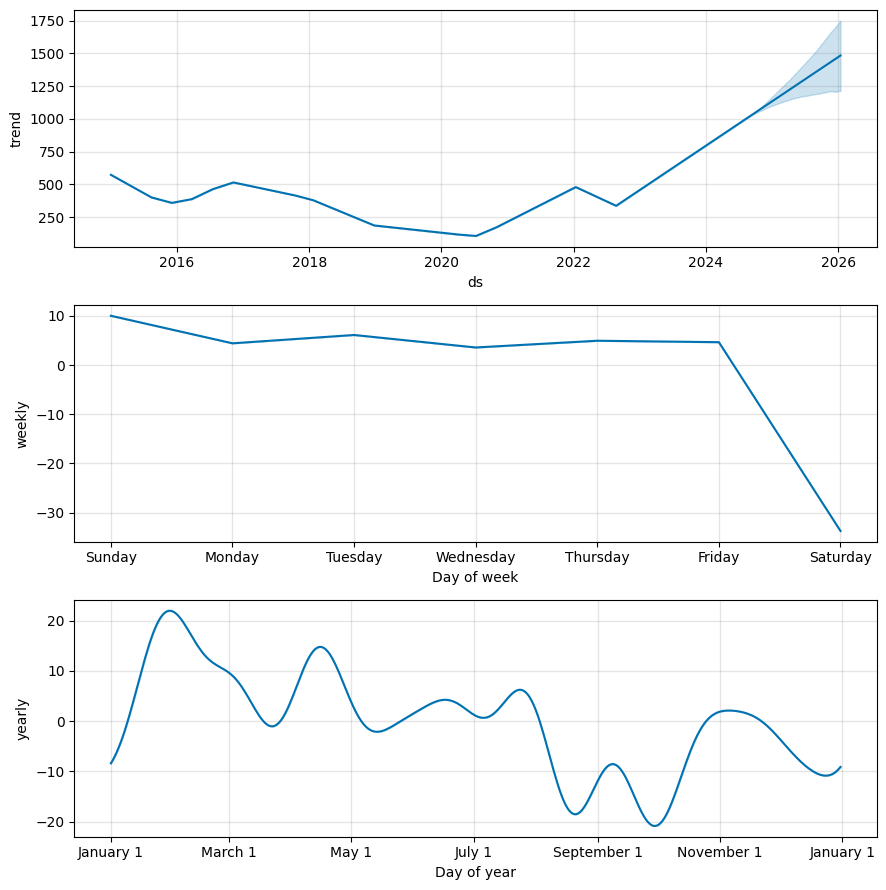

In [35]:
# Plot the forecast components (trend, seasonality)
model.plot_components(predict)


In [36]:
test_future = pd.DataFrame( { 'ds' : test.index })
test_future.head()

,ds
0,2023-01-02
1,2023-01-03
2,2023-01-04
3,2023-01-05
4,2023-01-06


In [37]:
predict1 = model.predict(test_future)

In [38]:
predict1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-02,459.072435,398.683357,510.587380,459.072435,459.072435,-3.660017,-3.660017,-3.660017,4.421486,4.421486,4.421486,-8.081503,-8.081503,-8.081503,0.0,0.0,0.0,455.412418
1,2023-01-03,459.998488,397.096152,514.551122,459.998488,459.998488,-1.249393,-1.249393,-1.249393,6.112235,6.112235,6.112235,-7.361628,-7.361628,-7.361628,0.0,0.0,0.0,458.749095
2,2023-01-04,460.924540,402.552809,514.806448,460.924540,460.924540,-2.975460,-2.975460,-2.975460,3.574098,3.574098,3.574098,-6.549558,-6.549558,-6.549558,0.0,0.0,0.0,457.949080
3,2023-01-05,461.850593,398.957322,519.490280,461.850593,461.850593,-0.702185,-0.702185,-0.702185,4.943379,4.943379,4.943379,-5.645564,-5.645564,-5.645564,0.0,0.0,0.0,461.148408
4,2023-01-06,462.776646,407.180343,522.712939,462.776646,462.776646,-0.002252,-0.002252,-0.002252,4.649010,4.649010,4.649010,-4.651263,-4.651263,-4.651263,0.0,0.0,0.0,462.774393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2024-07-19,981.366097,933.948884,1049.276438,981.366097,981.366097,9.776182,9.776182,9.776182,4.649010,4.649010,4.649010,5.127172,5.127172,5.127172,0.0,0.0,0.0,991.142279
379,2024-07-22,984.144255,934.346238,1052.134011,984.144255,984.144255,10.485967,10.485967,10.485967,4.421486,4.421486,4.421486,6.064480,6.064480,6.064480,0.0,0.0,0.0,994.630222
380,2024-07-23,985.070308,939.780426,1055.280957,985.070308,985.070308,12.321786,12.321786,12.321786,6.112235,6.112235,6.112235,6.209551,6.209551,6.209551,0.0,0.0,0.0,997.392094
381,2024-07-24,985.996360,932.482782,1054.488036,985.996360,985.996360,9.822733,9.822733,9.822733,3.574098,3.574098,3.574098,6.248635,6.248635,6.248635,0.0,0.0,0.0,995.819094


In [39]:
test.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-11,1008.000000,1025.500000,1007.049988,1020.799988,1020.799988,11983571.0
2024-07-12,1023.849976,1025.900024,1015.000000,1016.750000,1016.750000,7339644.0
2024-07-15,1021.349976,1029.800049,1017.299988,1024.449951,1024.449951,5847297.0
2024-07-16,1025.500000,1029.599976,1019.200012,1021.150024,1021.150024,4824555.0
2024-07-18,1022.950012,1027.000000,1008.000000,1024.550049,1024.550049,8010324.0
2024-07-19,1024.000000,1024.000000,986.650024,990.000000,990.000000,7400178.0
2024-07-22,990.000000,1008.000000,976.549988,1003.150024,1003.150024,7396198.0
2024-07-23,1007.900024,1008.650024,967.200012,1001.799988,1001.799988,10384177.0
2024-07-24,997.799988,1034.250000,995.150024,1027.699951,1027.699951,11469098.0


In [40]:
predict1.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
373,2024-07-11,973.957677,920.850093,1043.618974,973.957677,973.957677,6.526023,6.526023,6.526023,4.943379,4.943379,4.943379,1.582643,1.582643,1.582643,0.0,0.0,0.0,980.483699
374,2024-07-12,974.883729,925.902042,1038.683494,974.883729,974.883729,6.595538,6.595538,6.595538,4.649010,4.649010,4.649010,1.946528,1.946528,1.946528,0.0,0.0,0.0,981.479268
375,2024-07-15,977.661887,924.360845,1044.447031,977.661887,977.661887,7.693647,7.693647,7.693647,4.421486,4.421486,4.421486,3.272160,3.272160,3.272160,0.0,0.0,0.0,985.355534
376,2024-07-16,978.587940,929.599241,1049.250111,978.587940,978.587940,9.866584,9.866584,9.866584,6.112235,6.112235,6.112235,3.754349,3.754349,3.754349,0.0,0.0,0.0,988.454523
377,2024-07-18,980.440045,930.732990,1052.241228,980.440045,980.440045,9.640494,9.640494,9.640494,4.943379,4.943379,4.943379,4.697115,4.697115,4.697115,0.0,0.0,0.0,990.080539
378,2024-07-19,981.366097,933.948884,1049.276438,981.366097,981.366097,9.776182,9.776182,9.776182,4.649010,4.649010,4.649010,5.127172,5.127172,5.127172,0.0,0.0,0.0,991.142279
379,2024-07-22,984.144255,934.346238,1052.134011,984.144255,984.144255,10.485967,10.485967,10.485967,4.421486,4.421486,4.421486,6.064480,6.064480,6.064480,0.0,0.0,0.0,994.630222
380,2024-07-23,985.070308,939.780426,1055.280957,985.070308,985.070308,12.321786,12.321786,12.321786,6.112235,6.112235,6.112235,6.209551,6.209551,6.209551,0.0,0.0,0.0,997.392094
381,2024-07-24,985.996360,932.482782,1054.488036,985.996360,985.996360,9.822733,9.822733,9.822733,3.574098,3.574098,3.574098,6.248635,6.248635,6.248635,0.0,0.0,0.0,995.819094
382,2024-07-25,986.922413,939.918352,1060.877359,986.922413,986.922413,11.114054,11.114054,11.114054,4.943379,4.943379,4.943379,6.170674,6.170674,6.170674,0.0,0.0,0.0,998.036466


In [41]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test['High'] , predict1['yhat'])

64.61474168641371

In [42]:
model.predict(pd.DataFrame({'ds' : ['2024-09-17']}))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-09-17,1036.929253,969.342682,1092.266443,1036.929253,1036.929253,-7.135021,-7.135021,-7.135021,6.112235,6.112235,6.112235,-13.247256,-13.247256,-13.247256,0.0,0.0,0.0,1029.794231
